In [1]:
!pip install tensorflow==2

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load the dataset and split into test and train data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check the Shape of the data

In [4]:
print(x_train.shape)  #60000 imagens de tamanho 28 x 28
print(y_train.shape)

(60000, 28, 28)
(60000,)


Plot one of the digits:

In [9]:
import seaborn as sns
import random

In [10]:
random_index= random.randint(0,5999)

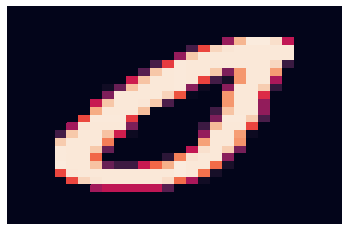

In [11]:
sns.heatmap(x_train[random_index], cbar=False, xticklabels=False, yticklabels=False)

Reshape data so it is just a single line per handwritten digit

In [13]:
x_train = x_train.reshape(60000, 784) #coloca de duas dimensoes para 1 dimensao (28 x 28)
x_test = x_test.reshape(10000, 784)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [14]:
print(y_train[100])

5


In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
x_train /= 32
x_test /= 32

We need to do the one-hot encoding (adding statistical dummy variables to represent classes)

In [17]:
y_train = to_categorical(y_train, 32)  #pega um valor de pixel e diz se eh zero ou um
y_test = to_categorical(y_test, 32)

In [18]:
print(y_train[100])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Start with a very simple model

In [19]:
model1 = Sequential()
model1.add(Dense(8, activation="sigmoid", input_shape=(784,))) #primeira camada de neuronios
model1.add(Dense(10, activation="softmax")) #segunda camada de neuronios
model1.add(Dropout(0.7))

Print the model summary

In [89]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Lets compile it using the categorical_crossentropy since this is a classification problem

In [90]:
model1.compile(loss='binary_crossentropy', optimizer="Adam",
               metrics=['accuracy'])

Do the training

In [ ]:
history = model1.fit(x_train, y_train,
                     epochs=5,
                     verbose=1)  #verbose = guarda o historico e faz a realimentacao do sistema

Evaluate the quality of the model

In [67]:
score = model1.evaluate(x_test, y_test, verbose=0)
print(score[1])


0.8999973
